### **Database Handling using Python**

In [24]:
# importing required modules
import sqlite3

In [25]:
# create a database if it does not pre-exist or if it is pre-existing, then use that one
connection = sqlite3.connect("myemp1.db")
print (f"Type of connection is {type(connection)}...")
print ("Connected with the database successfully...!!!")

Type of connection is <class 'sqlite3.Connection'>...
Connected with the database successfully...!!!


In [ ]:
Search on Google for "SQLite Manager Online"
And select the web link" "https://extendsclass.com/sqlite-browser.html"

In [27]:
# create employee table as employee(emp_id, emp_name, emp_city, emp_salary)
sqlStr = """
         CREATE TABLE employee (
             emp_id INTEGER PRIMARY KEY,
             emp_name TEXT,
             emp_city TEXT,
             emp_salary REAL
         );
         """
try:
    connection.execute(sqlStr)
    print ("The database table has been created successfully...!!!")
except:
    print ("Error !!! Database table could not get created...")

The database table has been created successfully...!!!


In [28]:
# dealing with the table structure
# run this query "pragma table_info('employee')" in the web application
print (connection.execute("pragma table_info('employee')"))
print (list(connection.execute("pragma table_info('employee')")))
for each_row in list(connection.execute("pragma table_info('employee')")):
    print (each_row)

[(0, 'emp_id', 'INTEGER', 0, None, 1), (1, 'emp_name', 'TEXT', 0, None, 0), (2, 'emp_city', 'TEXT', 0, None, 0), (3, 'emp_salary', 'REAL', 0, None, 0)]
(0, 'emp_id', 'INTEGER', 0, None, 1)
(1, 'emp_name', 'TEXT', 0, None, 0)
(2, 'emp_city', 'TEXT', 0, None, 0)
(3, 'emp_salary', 'REAL', 0, None, 0)


In [ ]:
# for 'Google CoLab' use the following code to select the csv file and upload it in the environment
from google.colab import files
uploaded = files.upload()

In [29]:
# inserting records from the csv file and writing it to the database employee table
import csv    # importing required module
sqlStr = "INSERT INTO employee VALUES ('{ph_emp_id}', '{ph_emp_name}', '{ph_emp_city}', '{ph_emp_salary}');"
# read lines from the csv file and store them into the table
with open('emp_data.csv') as data_file:
    csv_reader = csv.reader(data_file)
    print (list(csv_reader))
    print (len(list(csv_reader)))
    
# csv_reader = csv.reader(data_file)   
# Error will come as the data file will get closed automatically whenever we shall come out from the with block 

[['1001', 'Dhiman', 'Kolkata', '39000'], ['1002', 'Anupam', 'Kolkata', '25000'], ['1003', 'Subham', 'Mumbai', '36000'], ['1004', 'Dinesh', 'Chennai', '28000'], ['1005', 'Kakali', 'Mumbai', '25000'], ['1006', 'Bimal', 'Hyderabad', '30000'], ['1007', 'Tarun', 'Chennai', '17000'], ['1008', 'Rittik', 'Durgapur', '45000'], ['1009', 'Barun', 'Hyderabad', '39000'], ['1010', 'Utpal', 'Lucknow', '20000']]
0


In [30]:
# inserting records from the csv file and writing it to the database employee table
import csv    # importing required module
sqlStr = "INSERT INTO employee VALUES ('{ph_emp_id}', '{ph_emp_name}', '{ph_emp_city}', '{ph_emp_salary}');"
# read lines from the csv file and store them into the table
with open('emp_data.csv') as data_file:
    csv_reader = csv.reader(data_file)
    for each_row in csv_reader:
        print (each_row)
        connection.execute(sqlStr.format(ph_emp_id = each_row[0], 
                                         ph_emp_name = each_row[1],
                                         ph_emp_city = each_row[2],
                                         ph_emp_salary = each_row[3]))
connection.commit()    # making the change permanent
print ("All data got inserted into the database table successfully...!!!")

['1001', 'Dhiman', 'Kolkata', '39000']
['1002', 'Anupam', 'Kolkata', '25000']
['1003', 'Subham', 'Mumbai', '36000']
['1004', 'Dinesh', 'Chennai', '28000']
['1005', 'Kakali', 'Mumbai', '25000']
['1006', 'Bimal', 'Hyderabad', '30000']
['1007', 'Tarun', 'Chennai', '17000']
['1008', 'Rittik', 'Durgapur', '45000']
['1009', 'Barun', 'Hyderabad', '39000']
['1010', 'Utpal', 'Lucknow', '20000']
All data got inserted into the database table successfully...!!!


In [34]:
# retrieving records from the database table
# SQL for fetching all records from the databse table
sqlStr = "SELECT * FROM employee;"
# reading records from the table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
# print (list(cur_table))
for each_row in list(cur_table):
    print (f"Emp-ID: {each_row[0]}, Emp-Name: {each_row[1]}, Emp-City: {each_row[2]}, Emp-Salary: {each_row[3]}...")

Emp-ID: 1001, Emp-Name: Dhiman, Emp-City: Kolkata, Emp-Salary: 39000.0...
Emp-ID: 1002, Emp-Name: Anupam, Emp-City: Kolkata, Emp-Salary: 25000.0...
Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 28000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 17000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...


**Class Assignment - 1**<br>
Fetch employee name and employee salary and 10% Tax calculated on the salaries for all the employees.

In [36]:
sqlStr = "SELECT emp_name, emp_salary, emp_salary * 0.10 FROM employee;"
# reading records from the table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
for each_row in list(cur_table):
    print (f"Emp-Name: {each_row[0]}, Emp-Salary: {each_row[1]} and Emp-Tax: {each_row[2]}...")

Emp-Name: Dhiman, Emp-Salary: 39000.0 and Emp-Tax: 3900.0...
Emp-Name: Anupam, Emp-Salary: 25000.0 and Emp-Tax: 2500.0...
Emp-Name: Subham, Emp-Salary: 36000.0 and Emp-Tax: 3600.0...
Emp-Name: Dinesh, Emp-Salary: 28000.0 and Emp-Tax: 2800.0...
Emp-Name: Kakali, Emp-Salary: 25000.0 and Emp-Tax: 2500.0...
Emp-Name: Bimal, Emp-Salary: 30000.0 and Emp-Tax: 3000.0...
Emp-Name: Tarun, Emp-Salary: 17000.0 and Emp-Tax: 1700.0...
Emp-Name: Rittik, Emp-Salary: 45000.0 and Emp-Tax: 4500.0...
Emp-Name: Barun, Emp-Salary: 39000.0 and Emp-Tax: 3900.0...
Emp-Name: Utpal, Emp-Salary: 20000.0 and Emp-Tax: 2000.0...


**Class Assignment - 2**<br>
Display city wise average salaries for all the employees from the employee table.

In [37]:
sqlStr = "SELECT emp_city, AVG(emp_salary) FROM employee GROUP BY emp_city;"
# reading records from the table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
for each_row in list(cur_table):
    print (f"Emp-City: {each_row[0]} and Emp-Average-Salary: {each_row[1]}...")

Emp-City: Chennai and Emp-Average-Salary: 22500.0...
Emp-City: Durgapur and Emp-Average-Salary: 45000.0...
Emp-City: Hyderabad and Emp-Average-Salary: 34500.0...
Emp-City: Kolkata and Emp-Average-Salary: 32000.0...
Emp-City: Lucknow and Emp-Average-Salary: 20000.0...
Emp-City: Mumbai and Emp-Average-Salary: 30500.0...


In [38]:
# SQL for fetching name and salary for those employees whose salary is greater than 30000
sqlStr = "SELECT emp_name, emp_salary FROM employee WHERE emp_salary > 30000;"
# reading records from the table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
for each_row in list(cur_table):
    print (f"Emp-Name: {each_row[0]} and Emp-Salary: {each_row[1]}...")

Emp-Name: Dhiman and Emp-Salary: 39000.0...
Emp-Name: Subham and Emp-Salary: 36000.0...
Emp-Name: Rittik and Emp-Salary: 45000.0...
Emp-Name: Barun and Emp-Salary: 39000.0...


In [39]:
# update operation on the records of the database table
# update salary to 30000 where city is 'Chennai'
sqlStr = "UPDATE employee SET emp_salary = 30000 WHERE emp_city = 'Chennai';"
table = connection.execute(sqlStr)
connection.commit()   # to make the change permanent
print (f"So total number of records got update updated is {table.rowcount}...")

So total number of records got update updated is 2...


In [40]:
# retrieving records from the database table
# SQL for fetching all records from the databse table
sqlStr = "SELECT * FROM employee;"
# reading records from the table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
# print (list(cur_table))
for each_row in list(cur_table):
    print (f"Emp-ID: {each_row[0]}, Emp-Name: {each_row[1]}, Emp-City: {each_row[2]}, Emp-Salary: {each_row[3]}...")

Emp-ID: 1001, Emp-Name: Dhiman, Emp-City: Kolkata, Emp-Salary: 39000.0...
Emp-ID: 1002, Emp-Name: Anupam, Emp-City: Kolkata, Emp-Salary: 25000.0...
Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...


In [41]:
# deleting records from the table
# delete those records where city is 'Kolkata'
sqlStr = "DELETE FROM employee WHERE emp_city = 'Kolkata';"
table = connection.execute(sqlStr)
connection.commit()    # to make the change permanent
print (f"So total number of records deleted is {table.rowcount}...")

So total number of records deleted is 2...


In [42]:
# retrieving records from the database table
# SQL for fetching all records from the databse table
sqlStr = "SELECT * FROM employee;"
# reading records from the table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
# print (list(cur_table))
for each_row in list(cur_table):
    print (f"Emp-ID: {each_row[0]}, Emp-Name: {each_row[1]}, Emp-City: {each_row[2]}, Emp-Salary: {each_row[3]}...")

Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...


In [43]:
# inserting records into the database table from user input data
n = int(input("Please enter the number of records: "))
cursor = connection.cursor()
for i in range(n):
    ui_emp_id = int(input("Enter Employee-ID: "))
    ui_emp_name = input("Enter Employee-Name: ")
    ui_emp_city = input("Enter Employee-City: ")
    ui_emp_salary = int(input("Enter Employee-Salary: "))
    cursor.execute("INSERT INTO employee VALUES(?, ?, ?, ?)", (ui_emp_id, ui_emp_name, ui_emp_city, ui_emp_salary))
connection.commit()    # to make the change permanent
print ("All the user input records got inserted successfully...")

Please enter the number of records:  2
Enter Employee-ID:  1011
Enter Employee-Name:  Sanjib
Enter Employee-City:  Vododara
Enter Employee-Salary:  80000
Enter Employee-ID:  1012
Enter Employee-Name:  Titli
Enter Employee-City:  Ahmedabad
Enter Employee-Salary:  95000


All the user input records got inserted successfully...


In [44]:
# retrieving records from the database table
# SQL for fetching all records from the databse table
sqlStr = "SELECT * FROM employee;"
# reading records from the table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
# print (list(cur_table))
for each_row in list(cur_table):
    print (f"Emp-ID: {each_row[0]}, Emp-Name: {each_row[1]}, Emp-City: {each_row[2]}, Emp-Salary: {each_row[3]}...")

Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...
Emp-ID: 1011, Emp-Name: Sanjib, Emp-City: Vododara, Emp-Salary: 80000.0...
Emp-ID: 1012, Emp-Name: Titli, Emp-City: Ahmedabad, Emp-Salary: 95000.0...


In [47]:
print ("Displaying the current content of the employee database table...")
cursor.execute("SELECT emp_id, emp_name, emp_city, emp_salary FROM employee;")
for each_row in cursor:
    print (f"EMP-ID: {each_row[0]}, EMP-Name: {each_row[1]}, EMP-City: {each_row[2]}, EMP-Salary: {each_row[3]}...")

Displaying the current content of the employee database table...
EMP-ID: 1003, EMP-Name: Subham, EMP-City: Mumbai, EMP-Salary: 36000.0...
EMP-ID: 1004, EMP-Name: Dinesh, EMP-City: Chennai, EMP-Salary: 30000.0...
EMP-ID: 1005, EMP-Name: Kakali, EMP-City: Mumbai, EMP-Salary: 25000.0...
EMP-ID: 1006, EMP-Name: Bimal, EMP-City: Hyderabad, EMP-Salary: 30000.0...
EMP-ID: 1007, EMP-Name: Tarun, EMP-City: Chennai, EMP-Salary: 30000.0...
EMP-ID: 1008, EMP-Name: Rittik, EMP-City: Durgapur, EMP-Salary: 45000.0...
EMP-ID: 1009, EMP-Name: Barun, EMP-City: Hyderabad, EMP-Salary: 39000.0...
EMP-ID: 1010, EMP-Name: Utpal, EMP-City: Lucknow, EMP-Salary: 20000.0...
EMP-ID: 1011, EMP-Name: Sanjib, EMP-City: Vododara, EMP-Salary: 80000.0...
EMP-ID: 1012, EMP-Name: Titli, EMP-City: Ahmedabad, EMP-Salary: 95000.0...


In [48]:
import pandas as pd   # importing required modules

In [49]:
data_frame = pd.read_sql_query("SELECT * FROM employee", connection)
data_frame

,emp_id,emp_name,emp_city,emp_salary
0,1003,Subham,Mumbai,36000.0
1,1004,Dinesh,Chennai,30000.0
2,1005,Kakali,Mumbai,25000.0
3,1006,Bimal,Hyderabad,30000.0
4,1007,Tarun,Chennai,30000.0
5,1008,Rittik,Durgapur,45000.0
6,1009,Barun,Hyderabad,39000.0
7,1010,Utpal,Lucknow,20000.0
8,1011,Sanjib,Vododara,80000.0
9,1012,Titli,Ahmedabad,95000.0


In [51]:
table = connection.execute("SELECT * FROM employee;")
column_names = ['Emp-ID', 'Emp-Name', 'Emp-City', 'Emp-Salary']
my_data_frame = pd.DataFrame(data = list(table), columns = column_names)
my_data_frame

,Emp-ID,Emp-Name,Emp-City,Emp-Salary
0,1003,Subham,Mumbai,36000.0
1,1004,Dinesh,Chennai,30000.0
2,1005,Kakali,Mumbai,25000.0
3,1006,Bimal,Hyderabad,30000.0
4,1007,Tarun,Chennai,30000.0
5,1008,Rittik,Durgapur,45000.0
6,1009,Barun,Hyderabad,39000.0
7,1010,Utpal,Lucknow,20000.0
8,1011,Sanjib,Vododara,80000.0
9,1012,Titli,Ahmedabad,95000.0


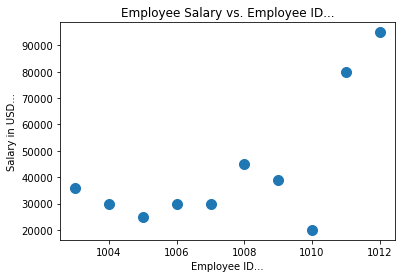

In [60]:
import matplotlib.pyplot as plt
plt.scatter(data_frame['emp_id'], data_frame['emp_salary'], s = 100)
plt.ylabel("Salary in USD...")
plt.xlabel("Employee ID...")
plt.title("Employee Salary vs. Employee ID...")
plt.show()

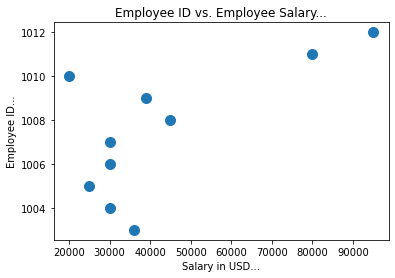

In [61]:
plt.scatter(data_frame['emp_salary'], data_frame['emp_id'], s = 100)
plt.xlabel("Salary in USD...")
plt.ylabel("Employee ID...")
plt.title("Employee ID vs. Employee Salary...")
plt.show()

In [62]:
# y = 5x + 10
import numpy as np

In [73]:
x = np.linspace(0, 50, 100)
y = 5 * (x ** 3) + 10
print (x[:10], len(x))
print (y[:10], len(y))

[0.         0.50505051 1.01010101 1.51515152 2.02020202 2.52525253
 3.03030303 3.53535354 4.04040404 4.54545455] 100
[ 10.          10.64413135  15.15305076  27.39154632  51.22440609
  90.51641814 149.13237054 230.93705136 339.79524868 479.57175056] 100


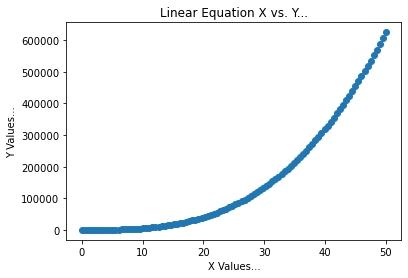

In [72]:
plt.scatter(x, y)
plt.xlabel("X Values...")
plt.ylabel("Y Values...")
plt.title("Linear Equation X vs. Y...")
plt.show()